# Decision Tree
> - This is a Soptify dataset provided by Kaggle <br>
https://www.kaggle.com/geomack/spotifyclassification
<br> 
- This is a utilizing the tutorial to build the tree <br>
https://www.youtube.com/watch?v=XDbj6PxaSf0 <br>

In [1]:
# !pip install spotipy
# !pip install graphviz
# !pip install pydotplus


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import graphviz
from graphviz import Source
import pydotplus
import io
from io import StringIO
from scipy import misc

%matplotlib inline

In [36]:
def show_tree(dt, features, path):
    f = io.StringIO()
    export_graphviz(dt, out_file=f, feature_names=features)
    graph = pydotplus.graph_from_dot_data(f.getvalue())
    graph.write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino


In [5]:
# plt.style.use('seaborn')

In [6]:
red_blue= ['#195B5E', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

In [7]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']

pos_dur = data[data['target'] == 1]['duration_ms']
neg_dur = data[data['target'] == 0]['duration_ms']

pos_loud = data[data['target'] == 1]['loudness']
neg_loud = data[data['target'] == 0]['loudness']

pos_speech = data[data['target'] == 1]['speechiness']
neg_speech = data[data['target'] == 0]['speechiness']

pos_val = data[data['target'] == 1]['valence']
neg_val = data[data['target'] == 0]['valence']

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']

pos_acoustic = data[data['target'] == 1]['acousticness']
neg_acoustic = data[data['target'] == 0]['acousticness']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

pos_instru = data[data['target'] == 1]['instrumentalness']
neg_instru = data[data['target'] == 0]['instrumentalness']

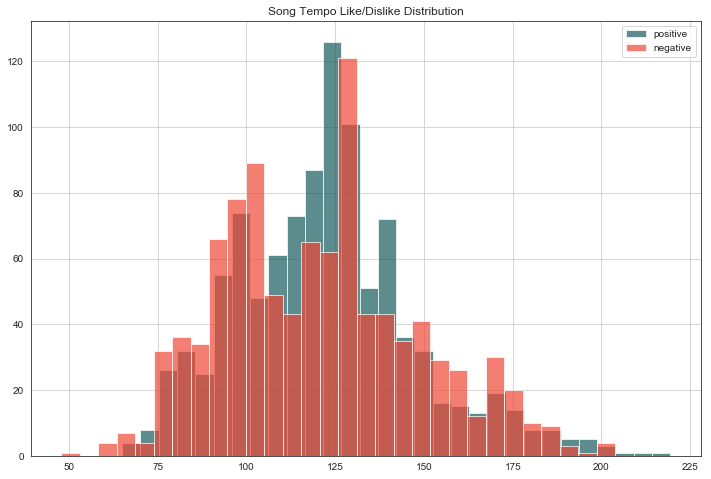

In [8]:
fig = plt.figure(figsize=(12, 8))
plt.title('Song Tempo Like/Dislike Distribution')
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right')

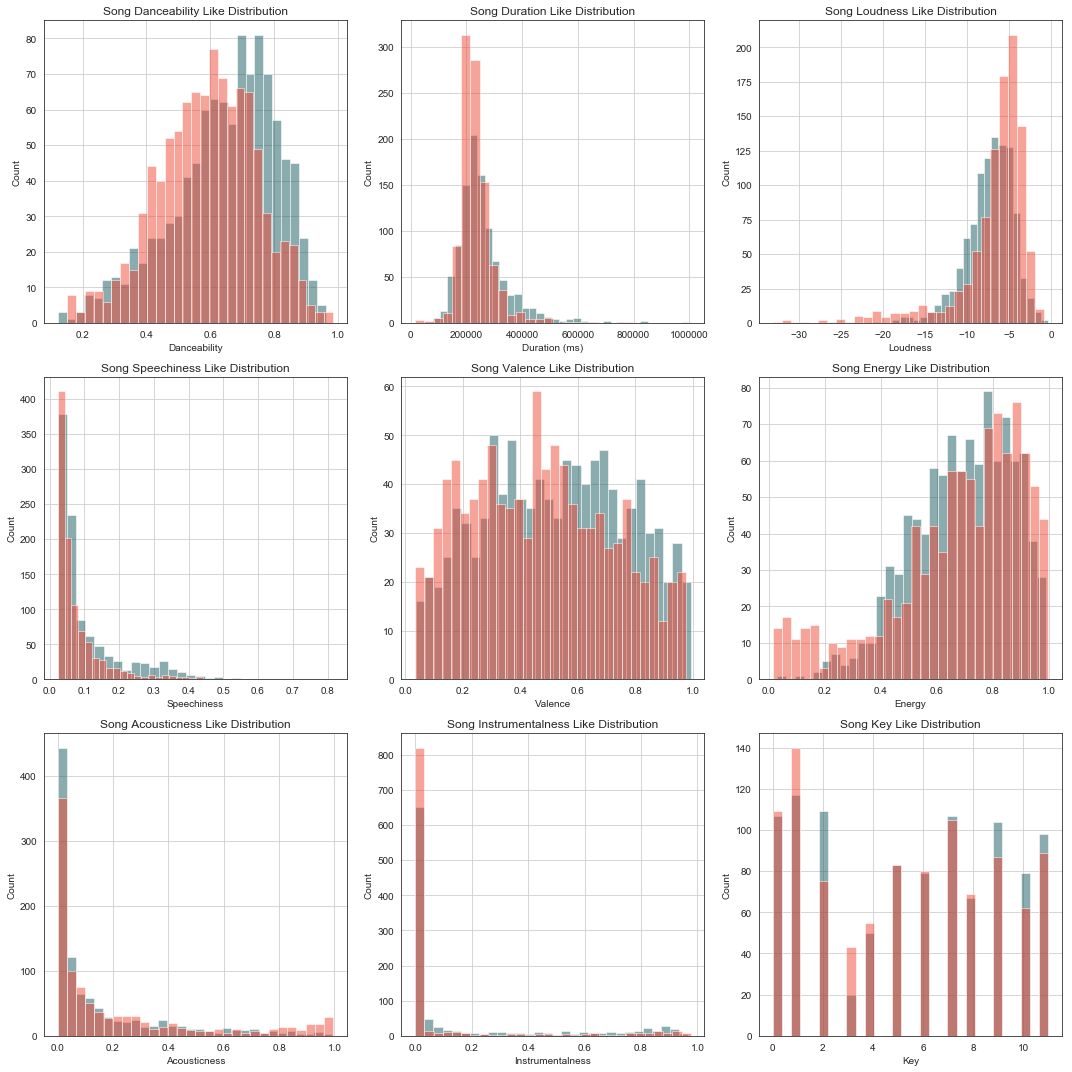

In [9]:
fig2 = plt.figure(figsize=(15,15))

# Danceability
ax3 = fig2.add_subplot(331)
pos_dance.hist(alpha=0.5, bins=30)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
# ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)

# Duration
ax5 = fig2.add_subplot(332)
pos_dur.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
# ax6 = fig2.add_subplot(332)
neg_dur.hist(alpha=0.5, bins=30)

# Loudness
ax7 = fig2.add_subplot(333)
pos_loud.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')
# ax8 = fig2.add_subplot(333)
neg_loud.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
pos_speech.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')
# ax10 = fig2.add_subplot(334)
neg_speech.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
pos_val.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like Distribution')
# ax12 = fig2.add_subplot(335)
neg_val.hist(alpha=0.5, bins=30)


# Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')
# ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Acousticness
ax15 = fig2.add_subplot(337)
pos_acoustic.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Acousticness')
ax15.set_ylabel('Count')
ax15.set_title('Song Acousticness Like Distribution')
# ax16 = fig2.add_subplot(337)
neg_acoustic.hist(alpha=0.5, bins=30)


# Instrumentalness
ax17 = fig2.add_subplot(338)
pos_instru.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title('Song Instrumentalness Like Distribution')
# ax18 = fig2.add_subplot(338)
neg_instru.hist(alpha=0.5, bins=30)

# Key
ax19 = fig2.add_subplot(339)
pos_key.hist(alpha=0.5, bins=30)
ax19.set_xlabel('Key')
ax19.set_ylabel('Count')
ax19.set_title('Song Key Like Distribution')
# ax20 = fig2.add_subplot(339)
neg_key.hist(alpha=0.5, bins=30)

plt.tight_layout()

In [24]:
train, test = train_test_split(data, test_size=0.25)

In [33]:
features = ['tempo', 'danceability', 'duration_ms', 'loudness', 'speechiness', 'valence', 'energy', 'acousticness', 'key', 'instrumentalness']

In [34]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

/Users/dom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


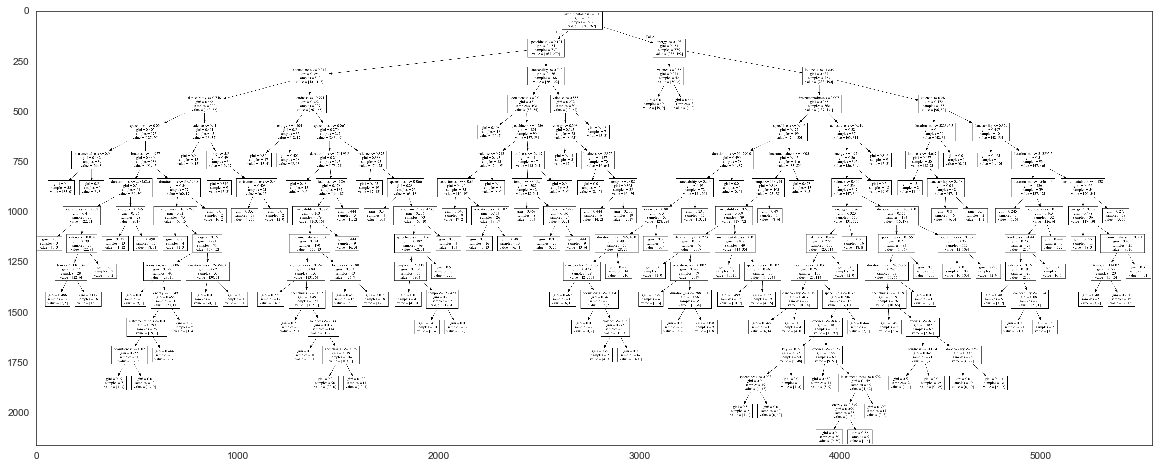

In [37]:
show_tree(dt, features, 'dec_tree_01.png')

In [63]:
c = tree.DecisionTreeClassifier(min_samples_split=100)
r = RandomForestClassifier(n_estimators=500)

In [64]:
dt = c.fit(X_train, y_train)
rmodel = r.fit(X_train, y_train)

In [65]:
yHat1 = c.predict(X_test)
yHat2 = r.predict(X_test)

In [66]:
score = accuracy_score(y_test, yHat1)
print("Decision Tree Accuracy: "+str(score))
score = accuracy_score(y_test, yHat2)
print("Random Forest Accuracy: "+str(score))

Decision Tree Accuracy: 0.7089108910891089
Random Forest Accuracy: 0.7801980198019802
